# Лабораторная работа 2. Исследовательский анализ данных


### Цель работы
Изучение связи между признаками двумерного набора данных,
визуализация данных.

### Задание
1. Загрузить датасет с помощью библиотеки pandas. Оценить его через info и describe. Выполнить предварительную обработку данных, если это необходимо.
2. Построить точечную диаграмму (матрицу диаграмм рассеяния) для всех признаков. Выполнить анализ полученной диаграммы, отвечая на вопрос показывает ли она в среднем определенную зависимость между переменными. Изучите параметры и опишите взаимосвязи. Если параметров слишком много – может потребоваться создать несколько графиков. Минимум один график (диаграмму рассеивания) сделать по категориям (Например, зависимость зарплаты и возраста по каждой должности. На таком графике различные должности должны быть показаны разными ветами).
3. Постройте гистограммы для каждого числового признака, подберите оптимальное количество bins, сделайте выводы по полученными гистограммам.
4. Исследовать взаимосвязь между переменными с помощью оценки коэффициента корреляции и ковариации. Построить heatmap (тепловую карту корреляции). Выполнить интерпретацию результатов корреляции и ковариации, отвечая на вопросы о наличии (отсутствии) линейной взаимосвязи между переменными. Понимать, что такое корреляция и ковариация.
5. Постройте графики по заданию в варианте. Выполните интерпретацию, что вы видите на этих графиках.
6. Выполните минимум один любой график типа hexagonal binning plot. Сделайте выводы.
7. Выполните минимум один график типа boxplot для любого столбца. Сделайте выводы.
8. Добавьте категорию по любому числовому столбцу (например, уровень зарплаты - высокий, низкий, средний). Сделайте boxplot по этому числовому столбцу по каждой новой категории (на boxplot будет box-ы для средней, низкой и высокой зарплаты).
9. Выполните ещё минимум 2 графика boxplot по другим категориям (например, зарплата по полу, зарплата по должности и т.п. - в результате несколько box-ов для каждой категории на ном графике). Используйте для построения графиков разные библиотеки (минимум 2). Сделайте вывод.
10. Сделайте общие выводы по работе. В том числе с качественной интерпретацией.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('clients2.csv', sep = ';')

### Описание предметной области
**Вариант 6**\
Датасет содержит информацию о данных клиентов, образовании, доходе, количестве детей.

- `Year_Birth` — год рождения клиента  
- `Education` — уровень образования  
- `Marital_Status` — семейное положение  
- `Income` — годовой доход  
- `Kidhome` — количество детей  
- `Dt_Customer` — дата регистрации в компании 
- `NumDealsPurchases` — количество покупок

## 1. Обзор данных

In [3]:
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,NumDealsPurchases
0,5524,1957,Graduation,Single,58138.0,0.0,04.09.2012,3.0
1,2174,1954,Graduation,Single,46344.0,1.0,08.03.2014,2.0
2,4141,1965,Graduation,Together,71613.0,0.0,21.08.2013,1.0
3,6182,1984,Graduation,Together,26646.0,1.0,10.02.2014,2.0
4,5324,1981,PhD,Married,58293.0,1.0,19.01.2014,5.0
5,7446,1967,Master,Together,62513.0,0.0,09.09.2013,2.0
6,965,1971,Graduation,Divorced,55635.0,0.0,13.11.2012,4.0
7,6177,1985,PhD,Married,33454.0,1.0,08.05.2013,2.0
8,4855,1974,PhD,Together,30351.0,1.0,06.06.2013,1.0
9,5899,1950,PhD,Together,5648.0,1.0,13.03.2014,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 796 non-null    int64  
 1   Year_Birth         796 non-null    int64  
 2   Education          796 non-null    object 
 3   Marital_Status     796 non-null    object 
 4   Income             784 non-null    float64
 5   Kidhome            795 non-null    float64
 6   Dt_Customer        795 non-null    object 
 7   NumDealsPurchases  795 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 49.9+ KB



В наборе данных 796 строк и 8 столбцов.
Типы данных: `object` , `float64`, `int64`.  
В столбцах `Income`, `Kidhome`, `Dt_Customer` и `NumDealsPurchases` присутствуют пропущенные значения. Остальные столбцы не имеют пропусков.




In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,NumDealsPurchases
count,796.000000,796.000000,784.00000,795.000000,795.000000
mean,5630.133166,1968.356784,53130.07398,0.438994,2.314465
std,3273.039715,12.022132,21818.56876,0.547252,1.941650
min,0.000000,1899.000000,2447.00000,0.000000,0.000000
25%,2853.000000,1959.000000,36141.75000,0.000000,1.000000
50%,5563.000000,1969.500000,52372.50000,0.000000,2.000000
75%,8584.250000,1977.000000,69293.25000,1.000000,3.000000
max,11191.000000,1995.000000,162397.00000,2.000000,15.000000


- **Year_Birth**\
  Средний год рождения клиентов — 1968, что соответствует среднему возрасту около 57 лет (на 2025 год). Диапазон значений — от 1899 до 1995 года, что может указывать на наличие выбросов (слишком старые значения).
  
- **Income**\
  Средний доход составляет около 53 130.  
  Минимальное значение — 2 447, максимальное — 162 397.  
  Разброс значений высокий, что говорит о разнообразии клиентской базы по уровню дохода.  

- **Kidhome**\
  Среднее значение — 0,44; медиана — 0.  
  Большинство клиентов не имеют детей, максимум — 2 ребёнка.

- **NumDealsPurchases**  \
  Среднее значение — 2,31; медиана — 2.  
  Минимум — 0, максимум — 15 покупок.  
  Это указывает на то, что большая часть клиентов совершает 1–3 покупки по акциям, однако присутствуют клиенты с высокой активностью.



## 2. Проверка и заполнение пропусков

In [6]:
print(df.isna().sum())

ID                    0
Year_Birth            0
Education             0
Marital_Status        0
Income               12
Kidhome               1
Dt_Customer           1
NumDealsPurchases     1
dtype: int64


Наибольшее количество пропусков наблюдается в столбце `Income` — 12 записей.\
В столбцах `Kidhome`, `Dt_Customer` и `NumDealsPurchases` пропусков по одной записи, что является незначительным и не оказывает влияния на общую структуру данных.
Пропущенные значения в `Income`, `Kidhome` и `NumDealsPurchases` будут заменены на средние значения.  
Для `Dt_Customer` среднее некорректно, поэтому будет заменено на наиболее часто встречающееся значение (мода).

In [9]:
df['Income'] = df['Income'].fillna(df['Income'].mean())
df['Kidhome'] = df['Kidhome'].fillna(df['Kidhome'].mean())
df['NumDealsPurchases'] = df['NumDealsPurchases'].fillna(df['NumDealsPurchases'].mean())

df['Dt_Customer'] = df['Dt_Customer'].fillna(df['Dt_Customer'].mode()[0])

print(df.isnull().sum())

ID                   0
Year_Birth           0
Education            0
Marital_Status       0
Income               0
Kidhome              0
Dt_Customer          0
NumDealsPurchases    0
dtype: int64


## 3. Поиск явных и неявных дубликатов

### Явные дубликаты

In [10]:
duplicate_rows = df[df.duplicated()]
print("Количество явных дубликатов:", duplicate_rows.shape[0])

Количество явных дубликатов: 4


In [11]:
df = df.drop_duplicates()
duplicate_rows = df[df.duplicated()]
print("Количество явных дубликатов:", duplicate_rows.shape[0])

Количество явных дубликатов: 0


### Неявные дубликаты

In [12]:
print(df['Education'].unique(), "\n")
print(df['Marital_Status'].unique(), "\n")

['Graduation' 'PhD' 'Master' 'Basic'] 

['Single' 'Together' 'Married' 'Divorced' 'MARRIED' 'SINGL' 'Widow'
 'Alone'] 



В столбце `Marital_Status` присутствуют дубликаты:
  `Married`, `MARRIED` - разные регистры;  
  `Single`, `SINGL` и `Alone` - опечатка и вероятно, относятся к одной категории (одинокие клиенты);  

В столбце `Education`: 
  категории `Graduation`, `PhD`, `Master`, `Basic` различны по смыслу и могут быть оставлены без изменений.

In [13]:
# приведение регистра и пробелов
df['Education'] = df['Education'].str.strip().str.lower()
df['Marital_Status'] = df['Marital_Status'].str.strip().str.lower()

df['Marital_Status'] = df['Marital_Status'].replace({
    'singl': 'single',
    'alone': 'single',
})

print(df['Education'].unique(), "\n")
print(df['Marital_Status'].unique(), "\n")

['graduation' 'phd' 'master' 'basic'] 

['single' 'together' 'married' 'divorced' 'widow'] 



## 4. Проверка типов данных

In [14]:
df.dtypes

ID                     int64
Year_Birth             int64
Education             object
Marital_Status        object
Income               float64
Kidhome              float64
Dt_Customer           object
NumDealsPurchases    float64
dtype: object

**Типы данных**  
- ID — целочисленный  
- Year_Birth — целочисленный  
- Education — строковый  
- Marital_Status — строковый  
- Income — вещественный  
- Kidhome — вещественный  
- Dt_Customer — строковый  
- NumDealsPurchases — вещественный  

Необходимо изменить `Kidhome` и `NumDealsPurchases` в целочисленный тип, потому что количество детей и покупок не может быть дробным.  
Также надо преобразовать `Dt_Customer` в тип `datetime`, так как это дата регистрации клиента.  


In [15]:
df['Kidhome'] = df['Kidhome'].astype('int64')
df['NumDealsPurchases'] = df['NumDealsPurchases'].astype('int64')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d.%m.%Y', errors='coerce')
df.dtypes

ID                            int64
Year_Birth                    int64
Education                    object
Marital_Status               object
Income                      float64
Kidhome                       int64
Dt_Customer          datetime64[ns]
NumDealsPurchases             int64
dtype: object

## 6. Построение матрицы рассеивания


Была построена матрица диаграмм рассеяния числовых признаков по семейному положению, где каждая ячейка показывает зависимость между двумя признаками — ```Year_Birth```, ```Income```, ```Kidhome```и ```NumDealsPurchases```. Цвет точек показывает семейное положение клиента:

- голубой — одинокие,
- оранжевый — встречающиеся,
- зелёный — женатые,
- красный — разведенные,
- серый — вдовцы.


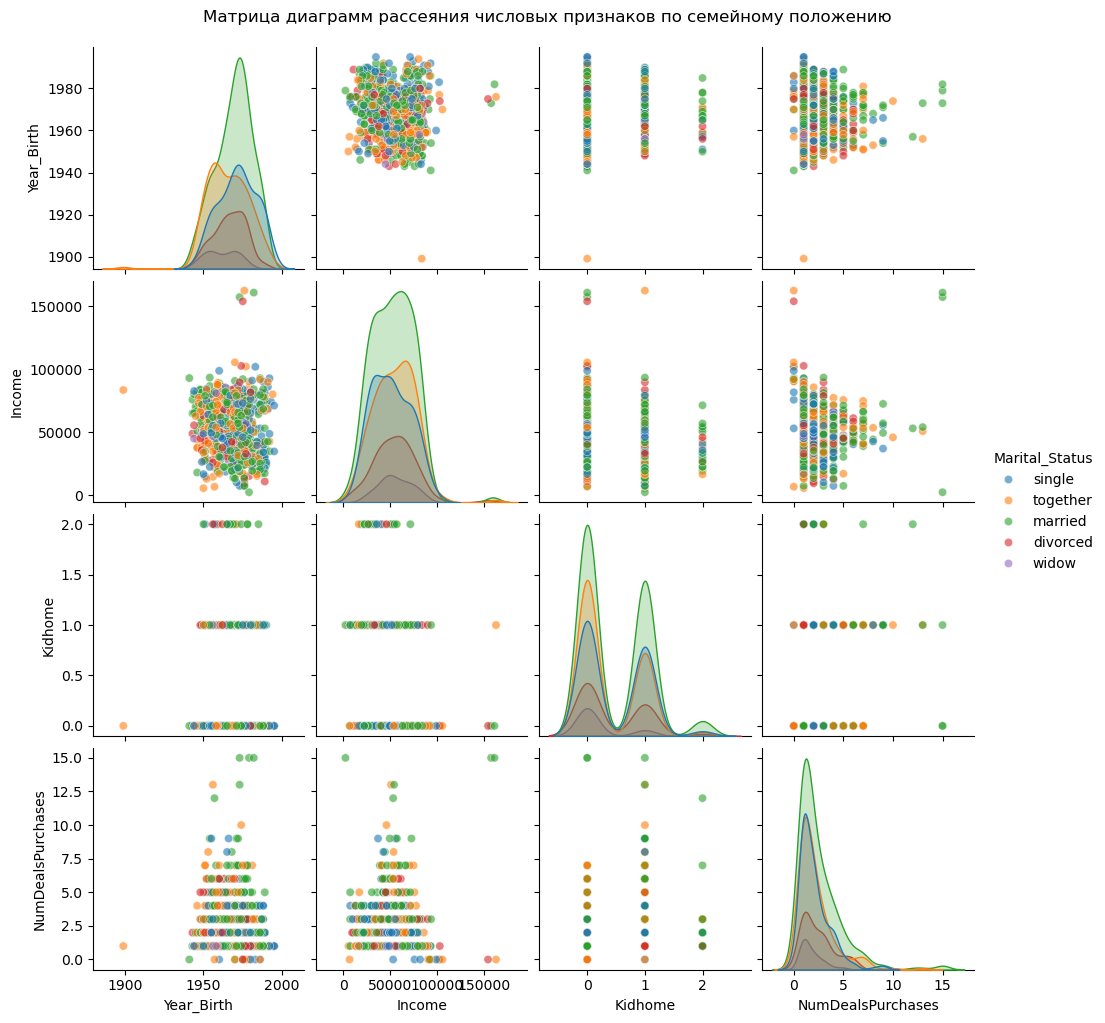

In [17]:
num_cols = ["Year_Birth", "Income", "Kidhome", "NumDealsPurchases"]
sns.pairplot(df[num_cols + ["Marital_Status"]], hue="Marital_Status", diag_kind="kde", plot_kws={'alpha': 0.6})

plt.suptitle("Матрица диаграмм рассеяния числовых признаков по семейному положению", y=1.02)
plt.show()


- **Year_Birth и Income**\
  Большинство клиентов родились между 1950–1980 годами. Наблюдается слабая тенденция к увеличению дохода с возрастом, однако без выраженной зависимости. Для всех категорий семейного положения распределение дохода примерно одинаковое.\
Клиенты старшего возраста (годы рождения ближе к 1940–1960) чаще относятся к категориям «вдовец/вдова» и «разведен/разведена». В то же время статусы «холост/не замужем» (single) и «проживают вместе» (together) преобладают среди более молодых клиентов (1970-е годы рождения и позже).\
Возраст является значимым фактором, определяющим распределение клиентов по семейному положению. При этом доход не демонстрирует выраженной зависимости от семейного статуса.

- **Income и Kidhome**\
Чаще всего количество детей у клиентов — 0 или 1, реже 2. Независимо от семейного положения, доход выше у тех, у кого нет детей. \
Наличие детей слабо отрицательно коррелирует с доходом.

- **Income и NumDealsPurchases**\
 На графике видно, что клиенты с низким и средним доходом совершают покупки чаще. С увеличением дохода количество покупок не растёт.\
Разница по семейному положению выражена слабо, но клиенты в статусах «женат/замужем» (married) и «проживают вместе» (together) совершают покупки несколько чаще, чем «холостые/не замужем» (single).

- **Kidhome и NumDealsPurchases**\
Чаще всего покупки совершают семьи с 0 или 1 ребёнком. При 2 детях активность снижается. Вывод: наличие большого числа детей снижает активность покупок.

- **Year_Birth и NumDealsPurchases**\
 Молодые клиенты (рождённые после 1970 года) совершают покупки чуть активнее, чем старшие. Среди старших клиентов (до 1950-х годов) количество покупок заметно ниже. Это справедливо почти для всех категорий семейного статуса.

**Вывод:**\
Возраст и семейное положение взаимосвязаны: Старшие клиенты чаще разведены или вдовы, а молодые — чаще холостые или живут вместе.
Доход не сильно зависит от семейного положения, но у людей без детей он немного выше.
Количество детей и доход обратно связаны: чем больше детей, тем в среднем ниже доход.
Чаще совершают покупки такие клиенты: без детей или с одним ребёнком, более молодые, люди со средним дозодом.
Семейное положение не оказывает сильного влияния на количественные показатели.

## 6. Гистограммы

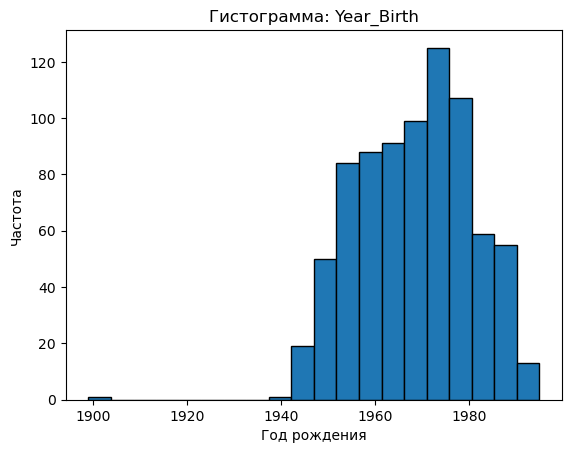

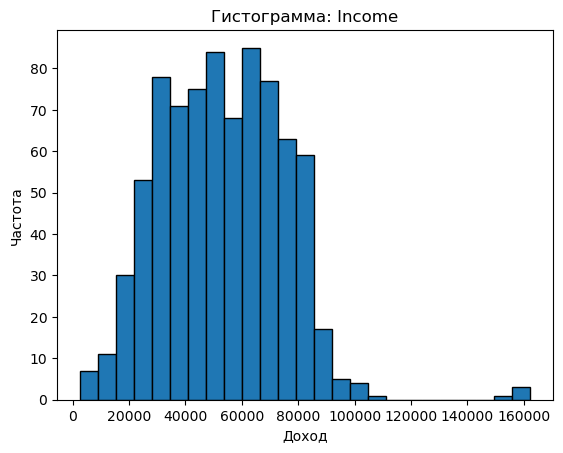

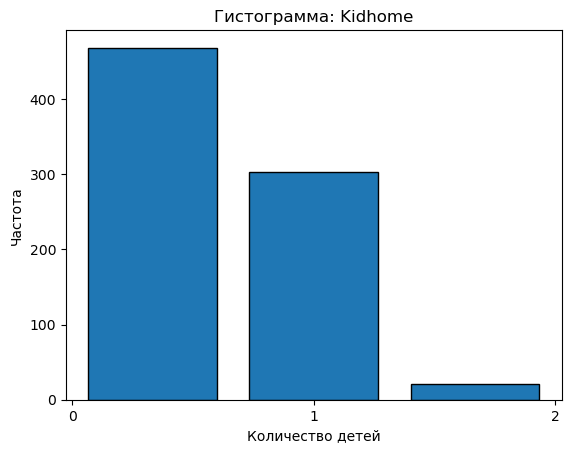

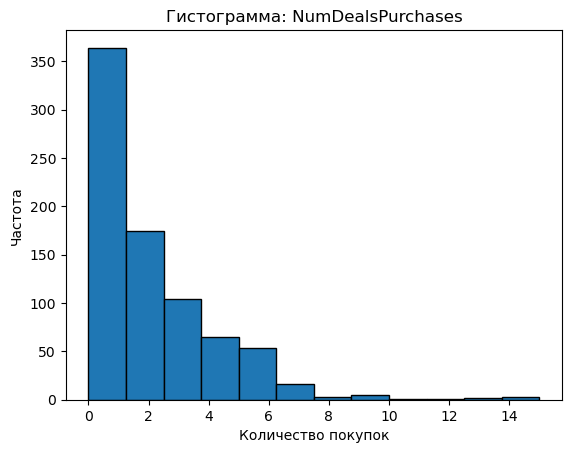

In [23]:
plt.hist(df["Year_Birth"], bins=20, edgecolor="black")
plt.title("Гистограмма: Year_Birth")
plt.xlabel("Год рождения")
plt.ylabel("Частота")
plt.show()

plt.hist(df["Income"], bins=25, edgecolor="black")
plt.title("Гистограмма: Income")
plt.xlabel("Доход")
plt.ylabel("Частота")
plt.show()

plt.hist(df["Kidhome"], bins=3, edgecolor="black", rwidth=0.8)
plt.title("Гистограмма: Kidhome")
plt.xlabel("Количество детей")
plt.ylabel("Частота")
plt.xticks([0, 1, 2])  
plt.show()

plt.hist(df["NumDealsPurchases"], bins=12, edgecolor="black")
plt.title("Гистограмма: NumDealsPurchases")
plt.xlabel("Количество покупок")
plt.ylabel("Частота")
plt.show()

 Были построены гистограммы для четырёх числовых признаков: Year_Birth, Income, Kidhome и NumDealsPurchases.

 - **Гистограмма: Year_Birth**\
На гистограмме представлено распределение клиентов по году рождения — от 1899 до 1995 года. Бинов было выбрано 20.
Пик распределения приходится на 1970–1980-е годы. Слева (до 1960) наблюдается резкое снижение частоты — клиентов старше 60 лет мало.
Справа (после 1985) также наблюдается спад — молодые клиенты (до 35 лет) представлены слабее.
Есть небольшой "выброс" в начале — один клиент родился в 1899 году (возможно, ошибка или уникальный случай).

- **Income**\
 Распределение доходов клиентов варьируется от ~2.5 тыс. до 162 тыс. долларов. Бинов было выбрано 25.
 Распределение резко скошено вправо — большинство клиентов имеют доход в диапазоне 30 000–80 000.
 Пик плотности находится около 50 000–60 000, что соответствует медианному значению 53 130.
 
- **Kidhome**\
Значения 0, 1, 2. Бинов было выбрано 3 — по одному на каждое возможное значение.
Подавляющее большинство клиентов — без детей, более 400 человек.
Клиенты с одним ребёнком — около 300.
Клиенты с двумя детьми — всего 20–30 человек.

- **NumDealsPurchases**\
 Показывает, сколько покупок было совершено клиентами. Значения от 0 до 15. Бинов было выбрано 12.
 Очень высокая частота у значения 0 — почти 350 клиентов не совершали покупок.
Значения 1–3 — самые распространённые, среди покупателей.
Далее частота быстро падает — малое количество людей делают больше 5 покупок.

**Выводы**\
Основная целевая аудитория — люди среднего возраста (40–60 лет), родившиеся в 1970–1980-х.\
Большинство клиентов — средний класс.\
Целевая аудитория — в основном взрослые без детей.\
Большая часть клиентов - неактивна.


## 7. Кореляция и ковариация

Матрица корреляции:
                   Year_Birth    Income   Kidhome  NumDealsPurchases
Year_Birth           1.000000 -0.142694  0.244132          -0.060943
Income              -0.142694  1.000000 -0.527935          -0.053444
Kidhome              0.244132 -0.527935  1.000000           0.198518
NumDealsPurchases   -0.060943 -0.053444  0.198518           1.000000

Матрица ковариации:
                     Year_Birth        Income      Kidhome  NumDealsPurchases
Year_Birth           144.573548 -3.724476e+04     1.605812          -1.425404
Income            -37244.757542  4.712258e+08 -6269.320767       -2256.753660
Kidhome                1.605812 -6.269321e+03     0.299262           0.211250
NumDealsPurchases     -1.425404 -2.256754e+03     0.211250           3.783926


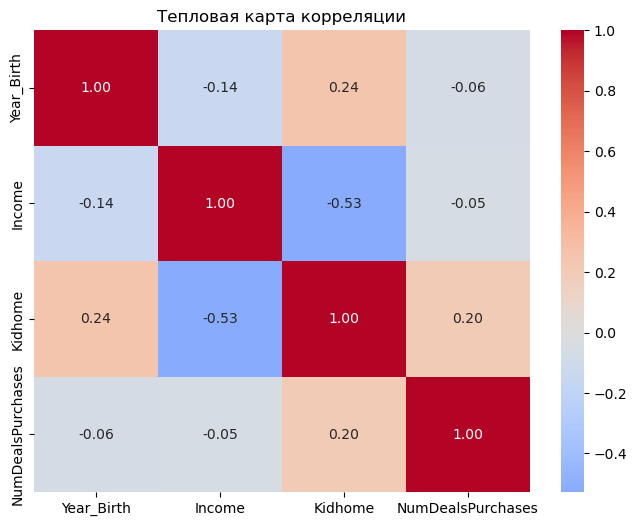

In [25]:
numeric_columns = ['Year_Birth', 'Income', 'Kidhome', 'NumDealsPurchases']
df_numeric = df[numeric_columns]

correlation_matrix = df_numeric.corr()

covariance_matrix = df_numeric.cov()

print("Матрица корреляции:")
print(correlation_matrix)
print("\nМатрица ковариации:")
print(covariance_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Тепловая карта корреляции")
plt.show()

**Матрица корреляции** демонстрирует следующие зависимости:\
Наиболее выраженная взаимосвязь наблюдается между доходом (Income) и количеством детей в доме (Kidhome) = -0,53. 
Это указывает на умеренно сильную обратную линейную зависимость: по мере роста дохода количество детей в семье, как правило, снижается. 
Между годом рождения (Year_Birth) и количеством детей (Kidhome) наблюдается умеренная положительная корреляция = 0,24. 
Более молодые клиенты чаще имеют детей.\
Между доходом и годом рождения зафиксирована слабая отрицательная корреляция = -0,14. Это говорит о том, что более старшее поколение имеет незначительно более высокий средний доход.\
Между количеством детей и числом покупок (NumDealsPurchases) наблюдается слабая положительная корреляция = 0,20. 
Семьи сдетьми более склонны к совершению покупок.\
Остальные пары переменных демонстрируют крайне слабые или практически отсутствующие линейные связи.

**Матрица ковариации** демонстрирует следующие зависимости:\
Наибольшая по модулю ковариация наблюдается между Income и Kidhome: -6269,32, что подтверждает обратную связь, выявленную ранее в корреляционной матрице.\
Ковариация между Year_Birth и Kidhome положительна = +1,61, что согласуется с положительной корреляцией = 0,24.\
Ковариация между Income и NumDealsPurchases отрицательна = -2256,75, хотя по модулю она меньше, чем между Income и Kidhome, что соответствует более слабой корреляции = -0,05.

**Тепловая карта корреляции**
Тепловая карта корреляции предоставляет наглядное представление о структуре линейных взаимосвязей между ключевыми переменными.\
Ярко-красные ячейки (близкие к +1) — сильная прямая связь (например, диагональ, где переменная коррелирует сама с собой).
Голубые ячейки (близкие к -1) — сильная обратная связь.
Серые/нейтральные тона — слабая или отсутствующая связь.
Наиболее заметным элементом является голубая ячейка на пересечении Income и Kidhome, показываюшая сильную отрицательную корреляцию. 

**Выводы:**\
Наиболее значимая взаимосвязь в наборе данных — это отрицательная корреляция между доходом и количеством детей в семье.\
Демографический фактор (Year_Birth) оказывает умеренное влияние на наличие детей в семье.\
Поведение потребителей (частота покупок) слабо связано с демографическими и экономическими характеристиками, за исключением небольшой тенденции к большему количеству покупок семьями с детьми.\
Отсутствие сильных корреляций между доходом и частотой покупок указывает на то, что ценовая чувствительность не обязательно связана с уровнем дохода.


## 9. Выполнение индивидуальных заданий

### Задание 1: Использовать seaborn. 
По группировке - количество клиентов по количеству детей и по каждому семейному статусу (marital_status) построить диаграмму.

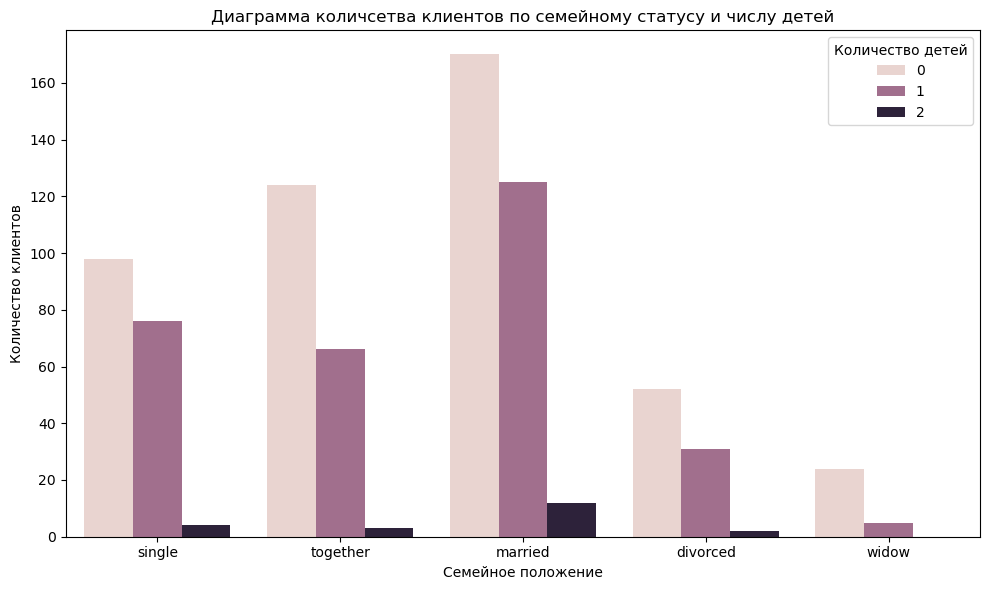

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Marital_Status", hue="Kidhome")

plt.title("Диаграмма количсетва клиентов по семейному статусу и числу детей")
plt.xlabel("Семейное положение")
plt.ylabel("Количество клиентов")
plt.legend(title="Количество детей")
plt.tight_layout()
plt.show()

Самая крупная группа клиентов — married (женатые) около 300 человек.\
Самая маленькая — widow (вдовцы) около 30 человек.\
Во всех категориях преобладают клиенты без детей.\
Наличие 1 ребёнка — вторая по величине группа во всех категориях, кроме widow.\
Наличие 2 детей — крайне редкое явление, особенно вне категории married.\
Основной целевой аудиторией являются семьи без детей — особенно в категории «женатые» и «живущие вместе».\
Клиенты с 1 ребёнком — вторая по значимости группа. 

### Задание 2: Использовать ```pandas``` и ```plot```. 
По сводной таблице ```pivot_table``` - отобразить минимальный доход по образованию. Отобразить маркеры в виде ⬤ красного цвета размером 18.


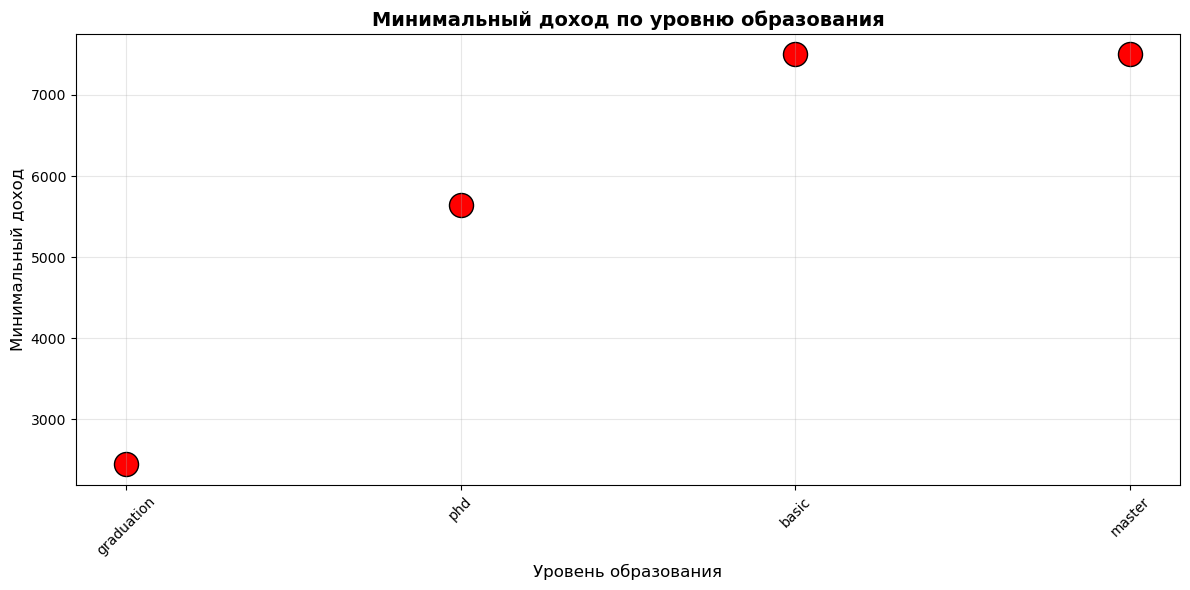

In [31]:
pivot_table = df.pivot_table(values='Income', index='Education', aggfunc='min')
pivot_table = pivot_table.sort_values('Income')

plt.figure(figsize=(12, 6))

plt.scatter(
    pivot_table.index, 
    pivot_table['Income'],
    s=300,          
    color='red',     
    marker='o',     
    edgecolors='black',
    linewidths=1     
)

plt.title('Минимальный доход по уровню образования', fontsize=14, fontweight='bold')
plt.xlabel('Уровень образования', fontsize=12)
plt.ylabel('Минимальный доход', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

- **graduation:**
   Этот уровень образования связан с самым низким минимальным доходом, который составляет примерно 1500.
- **phd:**
   Уровень PhD соответствует минимальному доходу примерно 5600. Это значительно выше, чем у "graduation", но ниже, чем у двух других категорий.
- **basic:** Уровень "basic" имеет минимальный доход примерно 7400 единиц.
- **master:** Уровень "master"  также имеет минимальный доход примерно 7400 единиц.

Самый высокий минимальный доход (примерно 7400) наблюдается у категорий клиентов с уровнем образования "basic" и "master", которые имеют примерно одинаковое значение.

### Задание 3: Использовать matplotlib.
Отфильтровать клиентов по year_birth больше 1980. Построить круговую диаграмму, которая отображает процент клиентов каждого семейного положения.

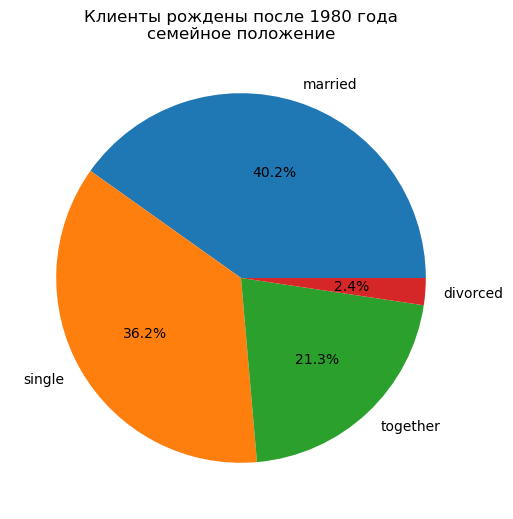

In [34]:
young_clients = df[df['Year_Birth'] > 1980]

status_counts = young_clients['Marital_Status'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%')
plt.title('Клиенты рождены после 1980 года\nсемейное положение')
plt.show()

Самая крупная группа — "married" — 40.2%. Это может говорить о зрелости возрастной группы или о традиционных ценностях в целевой аудитории.\
Вторая по величине группа — "single" — 36.2%.
Эта категория составляет более трети клиентов. Она близка по размеру к «married», что говорит о значительном количестве незамужних/неженатых людей в этой демографической группе.\
"Together" — 21.3%.
Это заметная доля, но значительно меньше, чем у женатых/замужних.\

Семейное положение клиентов преимущественно — официально оформленное (40.2%) или независимое (36.2%).
То есть, подавляющее большинство клиентов — либо состоят в браке, либо живут без партнёра.

## Дополнительная практика 
### Задание 1
Выполните минимум один любой график типа ```hexagonal binning plot```. Сделайте выводы.


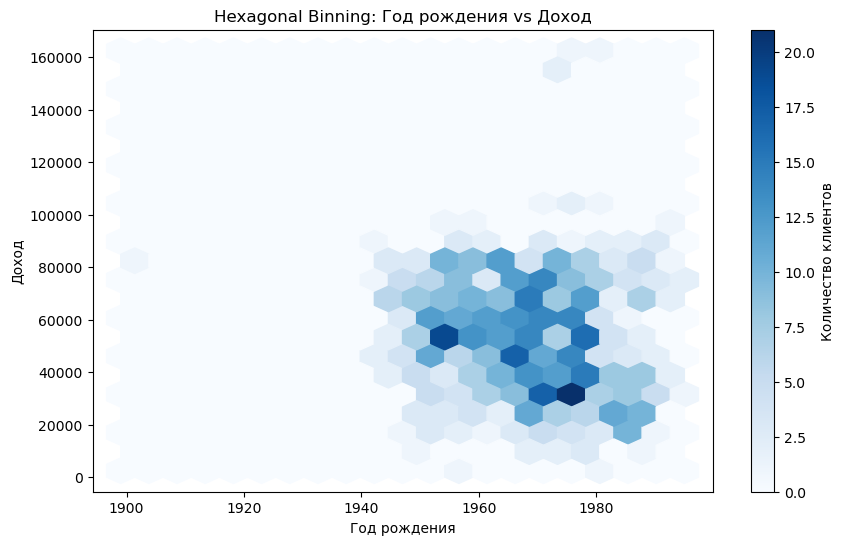

In [35]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['Year_Birth'], df['Income'], gridsize=20, cmap='Blues')
plt.colorbar(label='Количество клиентов')
plt.xlabel('Год рождения')
plt.ylabel('Доход')
plt.title('Hexagonal Binning: Год рождения vs Доход')
plt.show()

На графике показано плотностное распределение клиентов по двум переменным: год рождения (ось X) и доход (ось Y). Цвет ячеек (шестиугольников) показывает количество клиентов в каждом бине (темнее — больше клиентов).\

Ядро плотности находится примерно в диапазоне годов рождения ~1950–1980. Это означает, что в выборке большинство клиентов — люди среднего и старшего среднего возраста.
По доходу плотность сосредоточена приблизительно в диапазоне ~30 000 — 90 000. Самые тёмные шестиугольники сосредоточены около ~40–80 тысяч.\
Наблюдается слабая тенденция: более старшие клиенты (1950–1965) склонны встречаться в более высоких диапазонах дохода чаще, чем самые молодые (1975–1995). То есть, доходы у части старших клиентов выше, у более молодых — в среднем чуть ниже.\
Есть отдельные ячейки с очень высокими доходами (>120k), но они светлые — т.е. таких клиентов мало.
Также существуют единичные наблюдения с очень низким доходом. Эти выбросы распределены по разным годам рождения и не создают плотной области.

### Задание 2
Выполните минимум один график типа ```boxplot``` для любого столбца. Сделайте выводы.

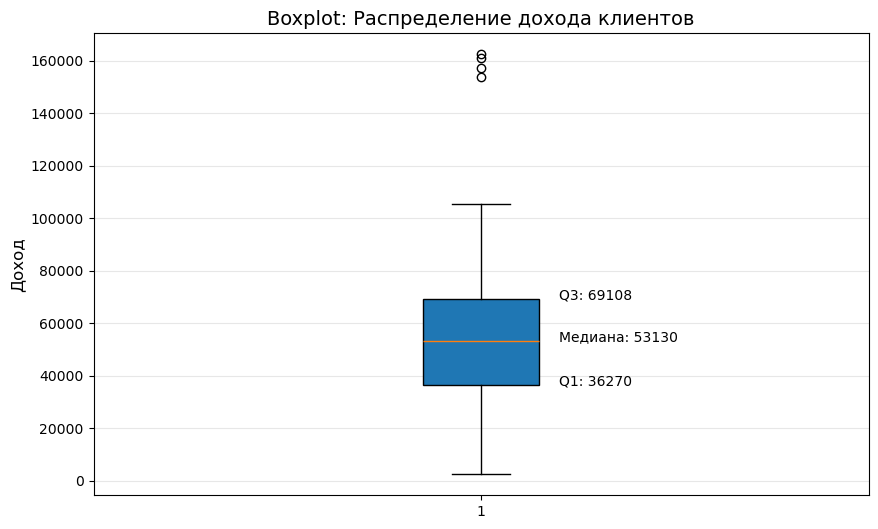

In [38]:

plt.figure(figsize=(10, 6))
plt.boxplot(df['Income'].dropna(), vert=True, patch_artist=True)
plt.title('Boxplot: Распределение дохода клиентов', fontsize=14)
plt.ylabel('Доход', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Добавляем статистику на график
stats = df['Income'].describe()
plt.text(1.1, stats['75%'], f"Q3: {stats['75%']:.0f}", fontsize=10)
plt.text(1.1, stats['50%'], f"Медиана: {stats['50%']:.0f}", fontsize=10)
plt.text(1.1, stats['25%'], f"Q1: {stats['25%']:.0f}", fontsize=10)

plt.show()


 - Нижний квартиль (Q1) ≈ 36 270
 - Верхний квартиль (Q3) ≈ 69 108
 - Медиана (срединное значение) ≈ 53 130\
   
50 % всех клиентов имеют доход в диапазоне от 36 000 до 69 000.
Половина клиентов зарабатывает меньше 53 130, а половина — больше.\
Распределение относительно симметрично, но с лёгким смещением в сторону более низких значений (о чём говорит хвост выбросов сверху).
Нижняя граница («ус») уходит примерно к нулю, что указывает на наличие клиентов с очень низким доходом.
Верхняя граница достигает примерно 100 000.
Всё, что выше этой линии — выбросы.\
На графике видно несколько точек выше 150 000–160 000 — это клиенты с крайне высоким доходом.
Эти выбросы делают распределение правосторонне скошенным (т.е. хвост тянется вправо — к большим доходам).

### Задание 3
Добавьте категорию по любому числовому столбцу (например, уровень зарплаты - высокий, низкий, средний). Сделайте boxplot по этому числовому столбцу по каждой новой категории (на boxplot будет box-ы для средней, низкой и высокой зарплаты).


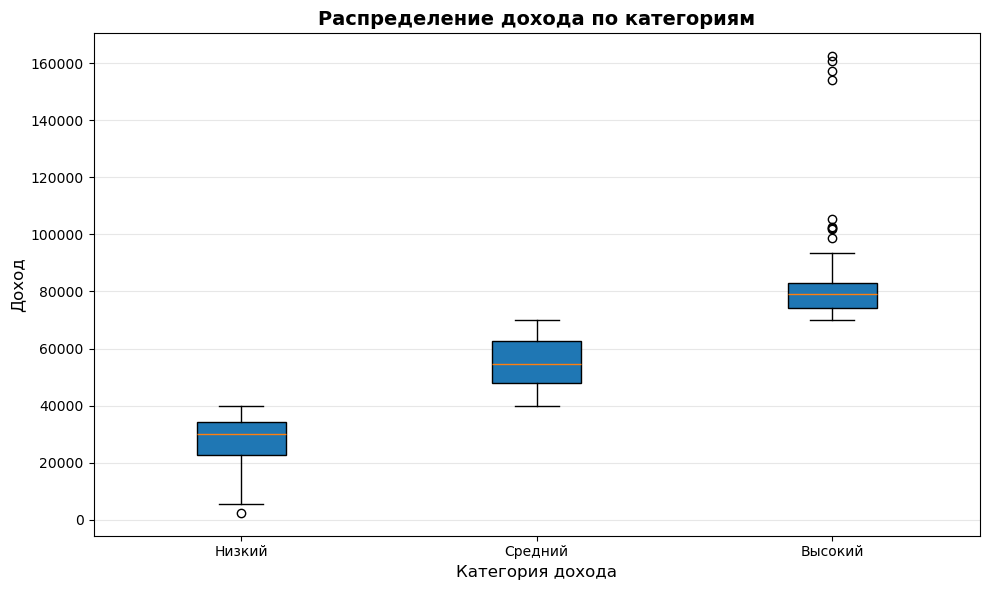

In [40]:
def categorize_income(income):
    if income <= 40000:
        return 'Низкий'
    elif income <= 70000:
        return 'Средний'
    else:
        return 'Высокий'
df['Income_Category'] = df['Income'].apply(categorize_income)

plt.figure(figsize=(10, 6))

categories = ['Низкий', 'Средний', 'Высокий']
data = [df[df['Income_Category'] == cat]['Income'] for cat in categories]

box_plot = plt.boxplot(data, tick_labels=categories, patch_artist=True)

plt.title('Распределение дохода по категориям', fontsize=14, fontweight='bold')
plt.xlabel('Категория дохода', fontsize=12)
plt.ylabel('Доход', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### Задание 4
Выполните ещё минимум 2 графика boxplot по другим категориям (например, зарплата по полу, зарплата по должности и т.п. - в результате несколько box-ов для каждой категории на одном графике). Используйте для построения графиков разные библиотеки (минимум 2). Сделайте вывод.

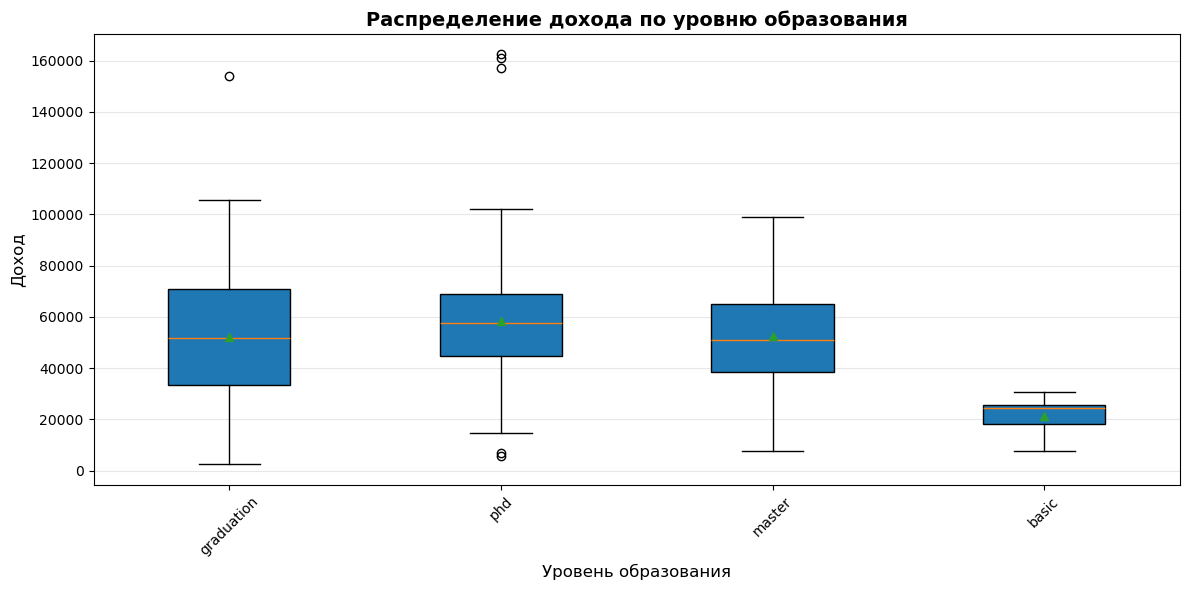

In [42]:
plt.figure(figsize=(12, 6))

education_groups = df['Education'].unique()
data_by_education = [df[df['Education'] == edu]['Income'].dropna() for edu in education_groups]

box_plot = plt.boxplot(data_by_education, 
                      tick_labels=education_groups,
                      patch_artist=True,
                      showmeans=True)  # Показываем средние значения

plt.title('Распределение дохода по уровню образования', fontsize=14, fontweight='bold')
plt.xlabel('Уровень образования', fontsize=12)
plt.ylabel('Доход', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

График показывает распределение доходов клиентов в зависимости от уровня образования.
По оси X отложены категории образования, по оси Y — величина дохода.\
Уровень дохода заметно зависит от образования — чем выше образование, тем в целом выше доход.

**basic**\
Имеет самый низкий уровень дохода среди всех групп.
Медиана (середина распределения) находится примерно на уровне 20 000–25 000.
Разброс небольшой, доходы сосредоточены в узком диапазоне (до ~30 000).

**graduation**\
Одна из самых многочисленных групп (широкий ящик).
Медиана дохода — около 50 000–55 000, что выше, чем у группы basic.
Разброс большой — доходы варьируются от 10 000 до 100 000 и выше.
Есть несколько выбросов (>150 000), указывающих на наличие клиентов с очень высоким доходом.

**master**\
Медианный доход сопоставим или немного выше, чем у "graduation" (~55 000–60 000).
Разброс широкий (примерно от 10 000 до 100 000).
Есть отдельные высокие выбросы (до 160 000).

**phd**\
Медианный доход близок к группе "master" (~55 000–60 000).
Присутствуют и низкие значения и выбросы выше 150 000.

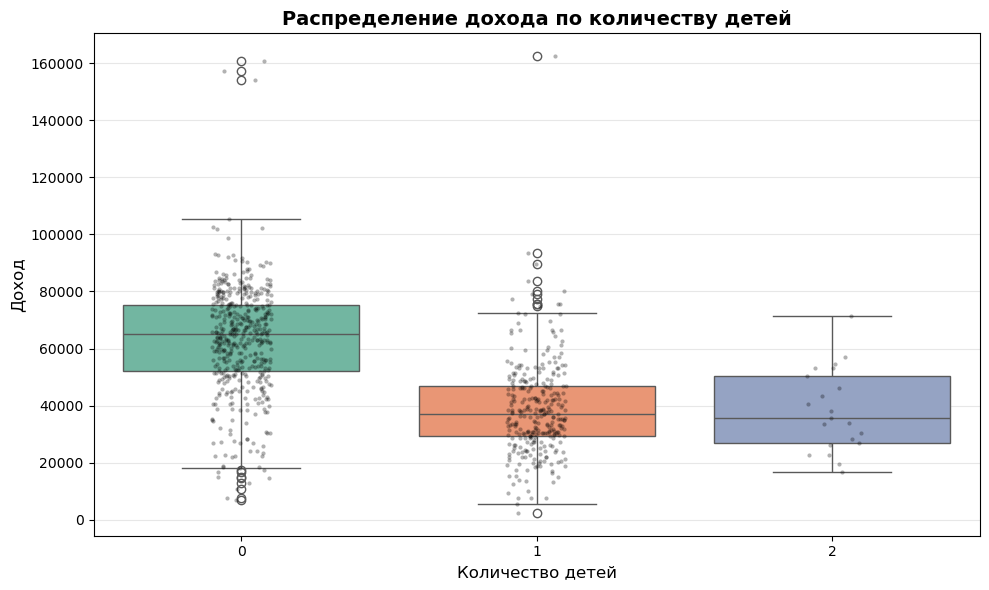

In [45]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='Kidhome', y='Income', 
            hue='Kidhome', palette='Set2', legend=False)

sns.stripplot(data=df, x='Kidhome', y='Income', 
              color='black', alpha=0.3, size=3, jitter=True)

plt.title('Распределение дохода по количеству детей', fontsize=14, fontweight='bold')
plt.xlabel('Количество детей', fontsize=12)
plt.ylabel('Доход', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Диаграмма показывающает распределение дохода клиентов в зависимости от количества детей в семье.
По оси X — количество детей (0, 1, 2), по оси Y — уровень дохода.\

Наблюдается явная отрицательная зависимость между количеством детей и уровнем дохода:
чем больше детей, тем ниже медианный доход.

- Клиенты без детей:
Наиболее высокая медиана дохода, около 60 000–65 000.
Разброс довольно большой — доходы варьируются от 10 000 до 100 000+.
Есть несколько выбросов выше 150 000.
Распределение относительно плотное, с концентрацией в диапазоне 50 000–80 000.

- Клиенты с одним ребёнком:
Медианный доход снижается до 35 000–40 000.
Разброс значительный, но нижняя граница ближе к нулю, что говорит о наличии семей с довольно низким доходом.
Выбросы до 160 000 встречаются, но редко.

- Клиенты с двумя детьми:
Медиана дохода примерно 40 000, что чуть выше, чем при одном ребёнке, но всё же значительно ниже, чем у бездетных.


## Вывод

В ходе выполнения лабораторной работы был проведён анализ данных с использованием библиотек pandas, matplotlib и seaborn.В ходе работы были навыки работы с описательной статистикой, корреляционным анализом и визуализацией данных. Полученные результаты позволили сделать выводы о распределении, связях и различиях между основными признаками в датасете. Работа показала, как статистические методы и визуализация помогают понять структуру данных, а также закрепила понимание таких понятий, как ковариация, корреляция, группировка, категоризация и вариационный анализ.